<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/HW_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='6'>**Домашняя работа 2**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных https://archive.ics.uci.edu/dataset/109/wine.


**Что нужно сделать:**

0. Загрузите данные https://archive.ics.uci.edu/dataset/109/wine, например вот так
```
from sklearn.datasets import load_wine  
data = load_wine()


1. Проведите разведочный анализ данных (EDA)

2. Если есть пропуски, заполнить пропуски

3. Уменьшить размерность с помощью PCA до 2 компонент

4. Оцените долю сохраненной дисперсии

5. Постройте scatterplot 1-ой и 2-ой главной компоненты, окрасить точки в зависиости от target (столбец class)







In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df, target = load_wine(return_X_y=True, as_frame=True)
df['target'] = target

### 1. Разведочный анализ данных (EDA)

In [2]:
# Посмотрим на данные
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Посмотрим на мнформацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
# Размерность данных
print("Форма датафрейма:", df.shape)


# Уникальные значения в целевой переменной
print("\nРаспределение классов в целевой переменной:")
print(df['target'].value_counts())

Форма датафрейма: (178, 14)

Распределение классов в целевой переменной:
target
1    71
0    59
2    48
Name: count, dtype: int64


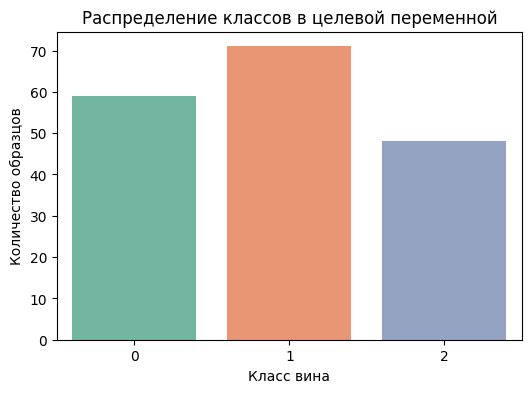

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target', palette='Set2', legend=False)
plt.title('Распределение классов в целевой переменной')
plt.xlabel('Класс вина')
plt.ylabel('Количество образцов')
plt.show()

### 2. Пропуски и дубликаты

In [6]:
# Кол-во пропущенных значений по каждому признаку
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

# Кол-во дубликатов
print("\nКоличество дубликатов в датафрейме:")
print(df.duplicated().sum())

Пропущенные значения по столбцам:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Количество дубликатов в датафрейме:
0


Хорошие данные, ни пропусков ни дубликатов нет

### 3. Статистическое описание признаков

In [7]:
# Основные описательные статистики
df.drop(columns='target').describe().loc[['min', 'max', 'mean', '50%']].rename({'50%': 'median'}).T

,min,max,mean,median
alcohol,11.03,14.83,13.000618,13.050
malic_acid,0.74,5.80,2.336348,1.865
ash,1.36,3.23,2.366517,2.360
alcalinity_of_ash,10.60,30.00,19.494944,19.500
magnesium,70.00,162.00,99.741573,98.000
total_phenols,0.98,3.88,2.295112,2.355
flavanoids,0.34,5.08,2.029270,2.135
nonflavanoid_phenols,0.13,0.66,0.361854,0.340
proanthocyanins,0.41,3.58,1.590899,1.555
color_intensity,1.28,13.00,5.058090,4.690


### 4. Распределение признаков по классам вина

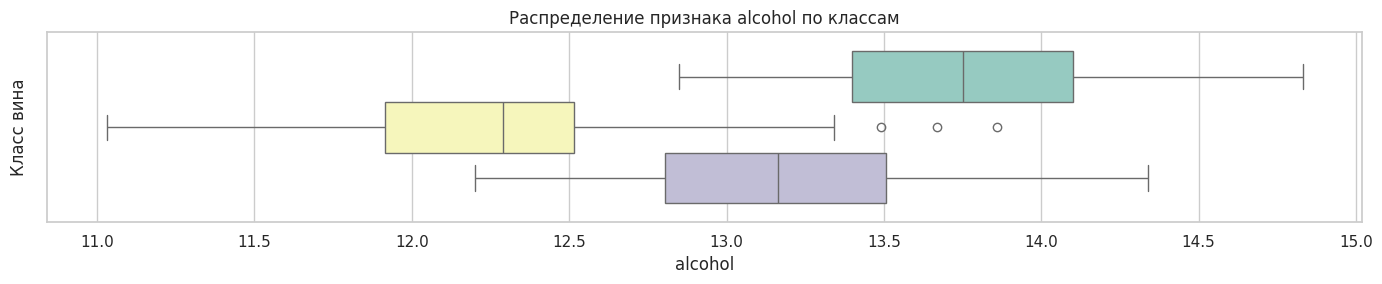

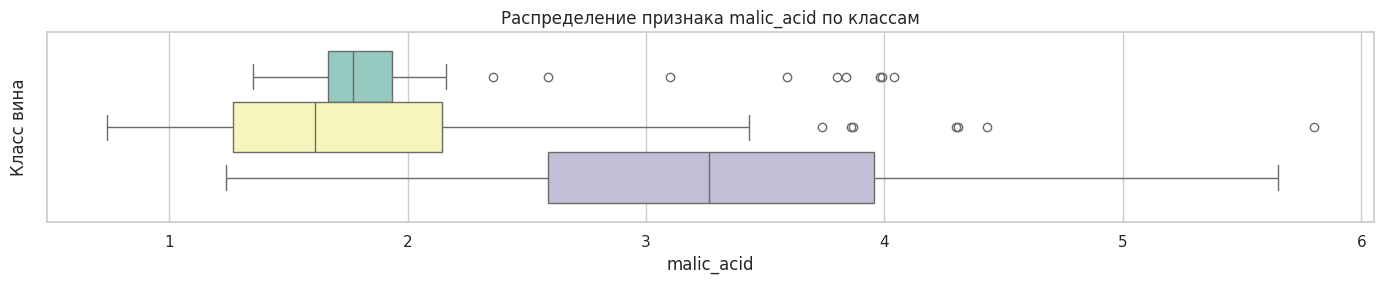

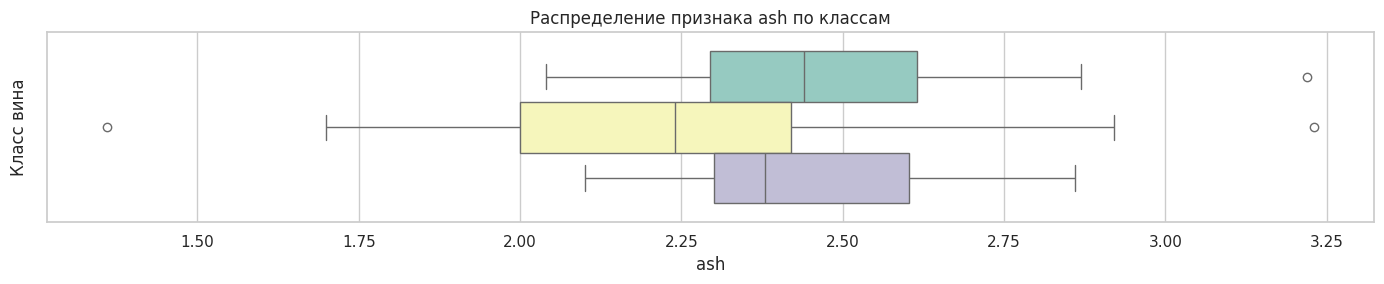

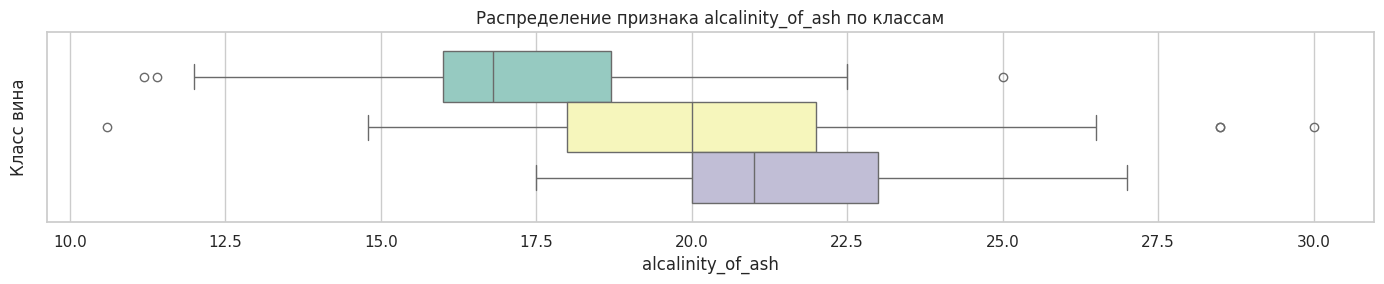

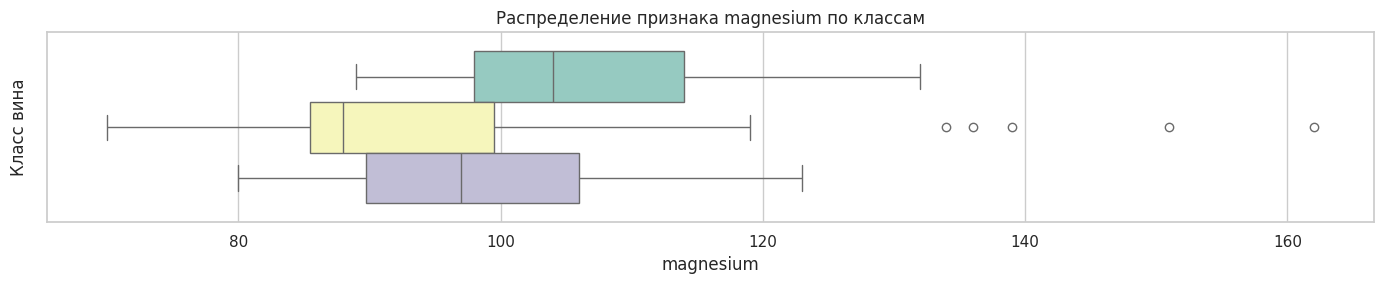

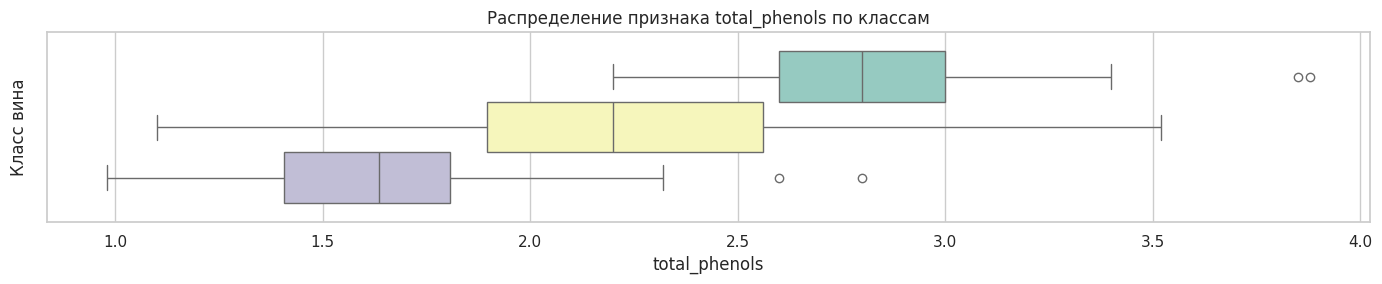

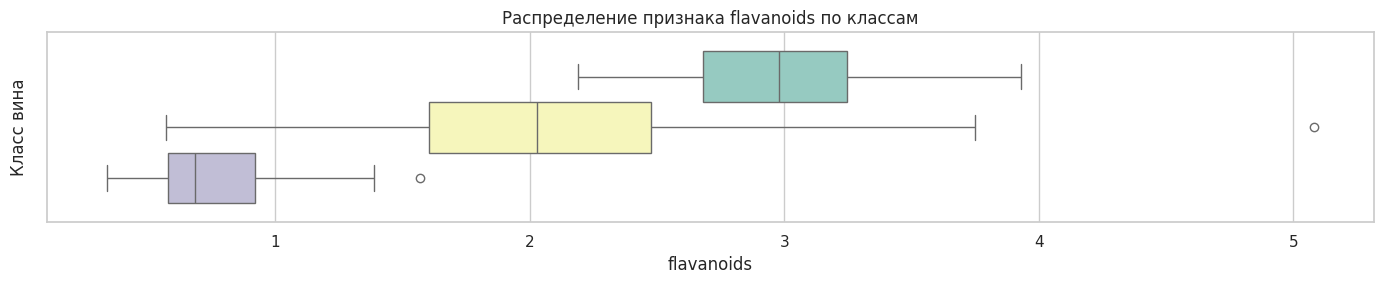

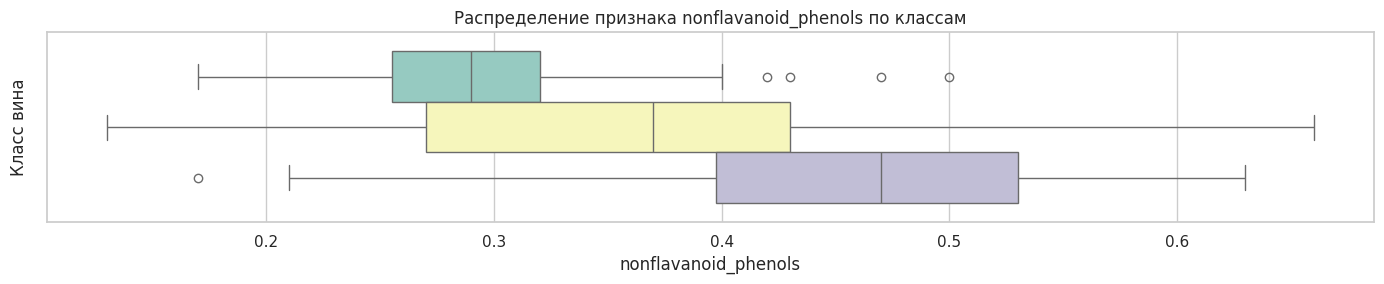

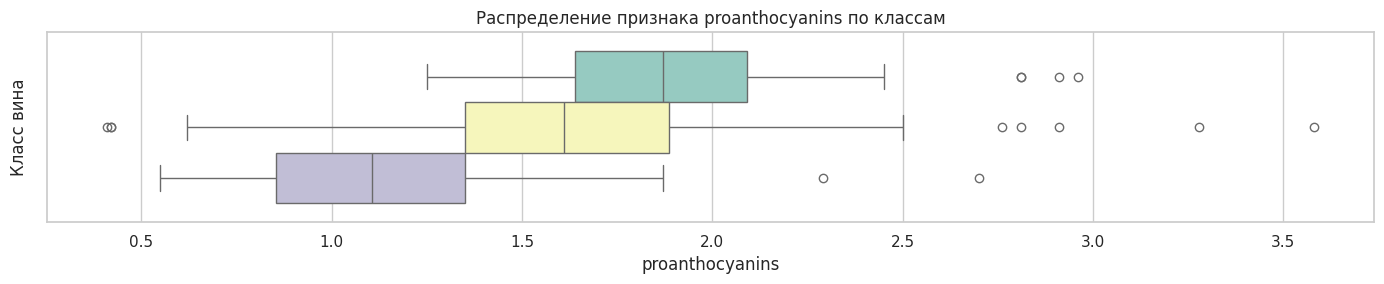

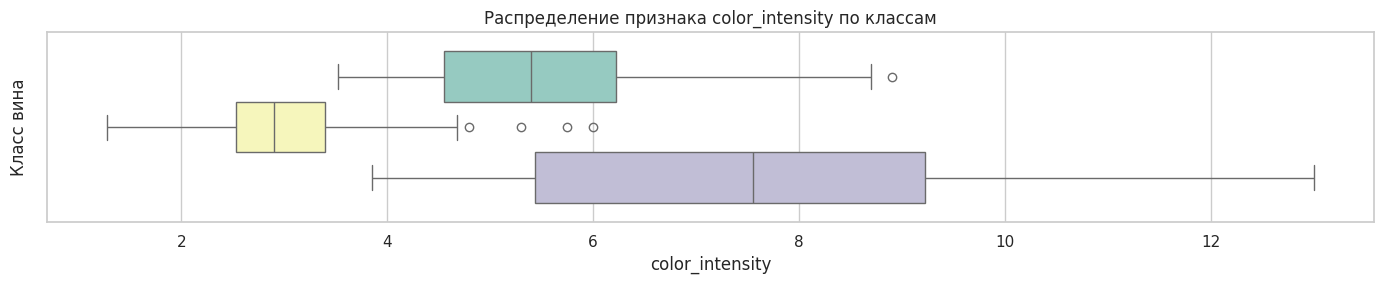

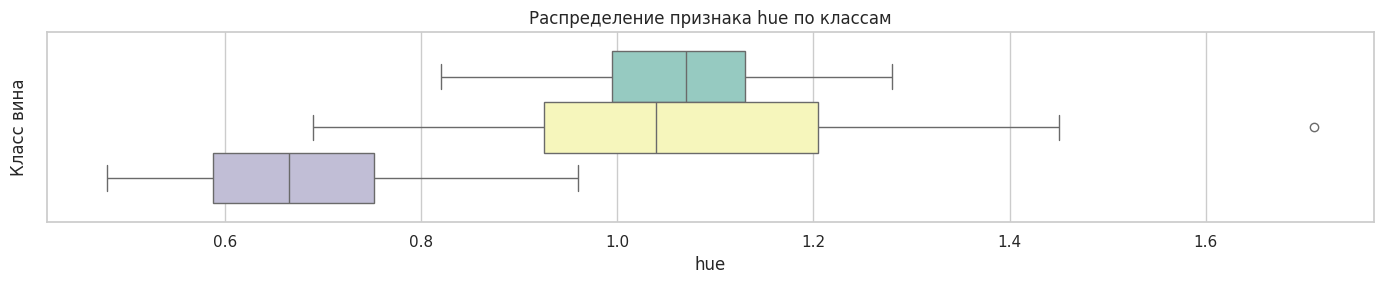

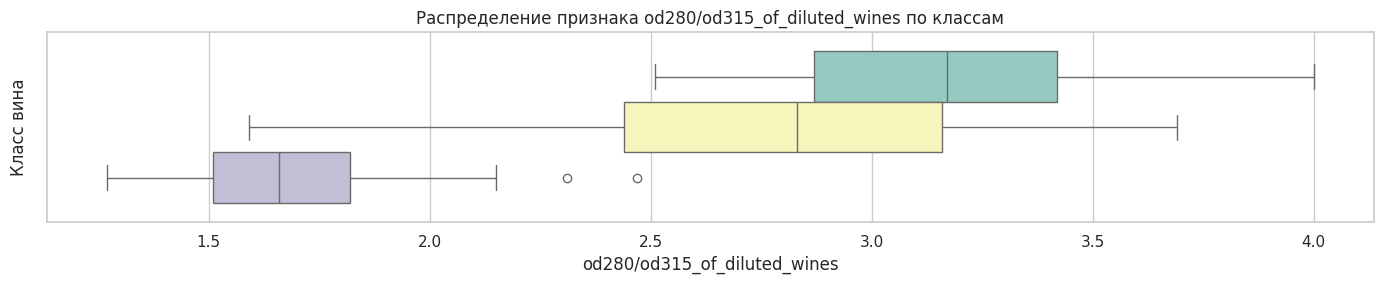

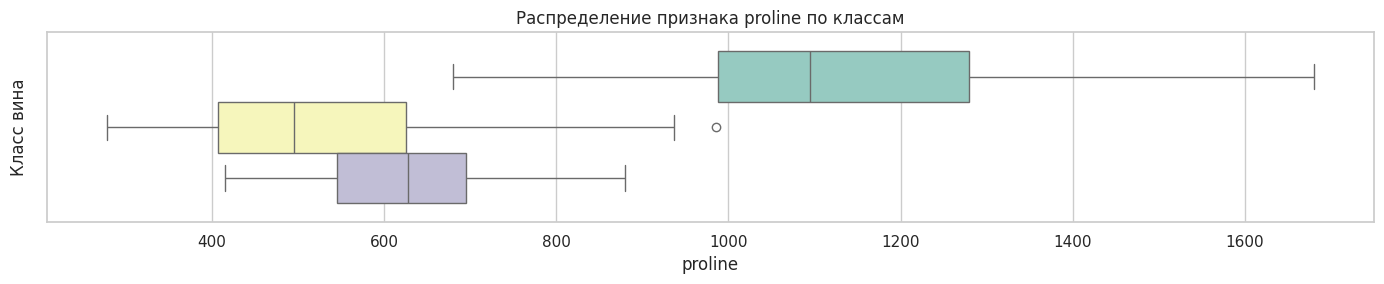

In [8]:
# Список признаков без целевой переменной
features = df.columns.drop('target')

sns.set(style='whitegrid')

for col in features:
    plt.figure(figsize=(14, 3))
    sns.boxplot(data=df, x=col, hue='target', palette='Set3', legend=False)
    plt.title(f'Распределение признака {col} по классам')
    plt.ylabel('Класс вина')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

У некоторых признаков присутствуют выбросы.

### 5. Корреляционная матрица и тепловая карта

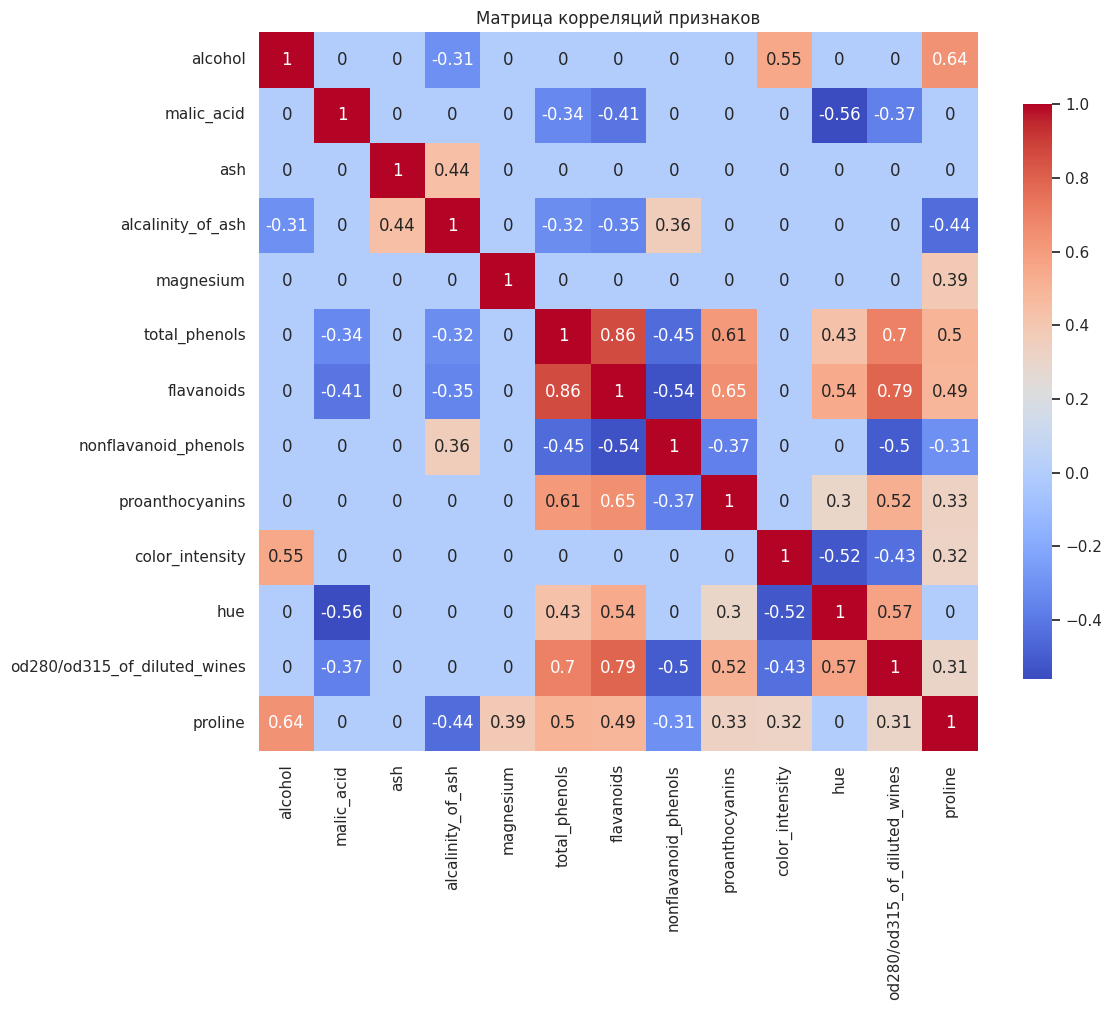

In [9]:
# Матрица корреляций без целевой переменной
corr_matrix = df.drop(columns='target').corr()
corr_matrix = np.round(corr_matrix, 2)
# Зунулим значения не большой корреляции
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Матрица корреляций признаков")
plt.tight_layout()
plt.show()

У некоторых признаков есть сильная корреляция между собой.

In [10]:
# Обнулим диагональ, чтобы исключить самокорреляцию
corr_matrix_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, 0)

# Получим пары признаков с корреляцией > 0.9 или < -0.9
high_corr_pairs = (
    corr_matrix_no_diag
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Оставим только высокие корреляции
high_corr_pairs = high_corr_pairs[
    high_corr_pairs['Correlation'].abs() > 0.7
].sort_values(by='Correlation', ascending=False)

# Удалим дубликаты (A-B и B-A)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature 1'] < high_corr_pairs['Feature 2']]

high_corr_pairs.reset_index(drop=True, inplace=True)
high_corr_pairs

,Feature 1,Feature 2,Correlation
0,flavanoids,total_phenols,0.86
1,flavanoids,od280/od315_of_diluted_wines,0.79


### 6. Снижение размерности с помощью PCA и визуализация

Доля сохранённой дисперсии:

Первая компонента: 0.9981

Вторая компонента: 0.0017

Суммарно: 0.9998



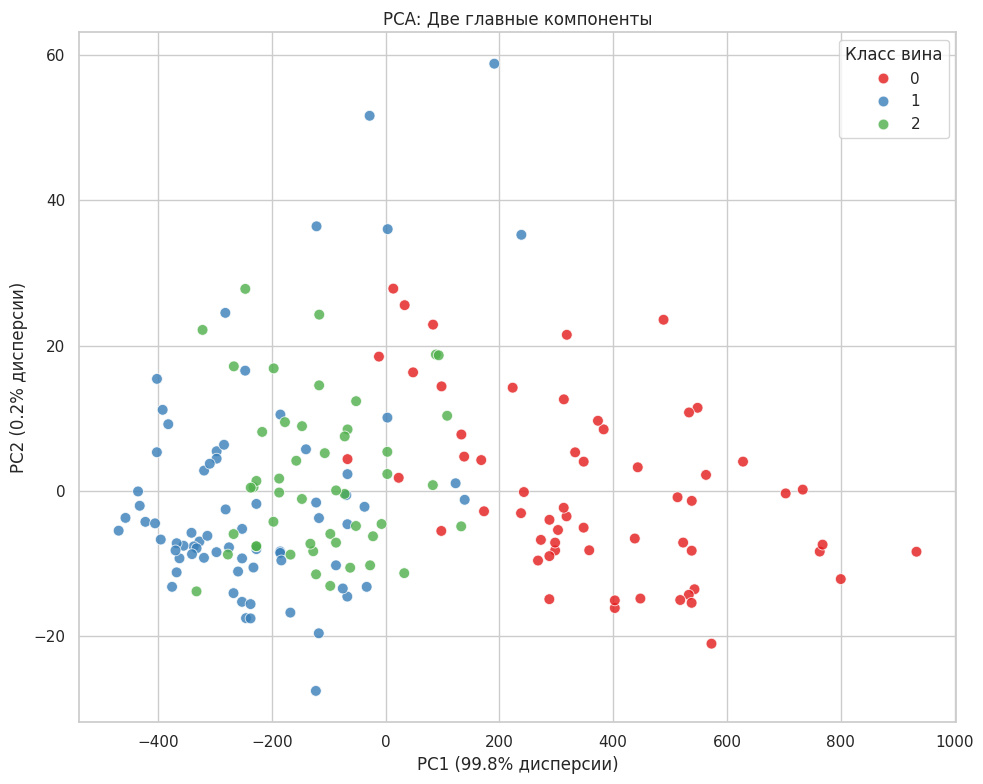

In [11]:
# Отделяем признаки и целевую переменную
X = df.drop(columns='target')
y = df['target']

# Инициализация PCA с 2 компонентами
pca = PCA(n_components=2)

# Обучаем PCA и преобразуем данные
X_pca = pca.fit_transform(X)

# Доля сохранённой дисперсии
explained_variance = pca.explained_variance_ratio_
print(f"Доля сохранённой дисперсии:\n")
print(f"Первая компонента: {explained_variance[0]:.4f}\n")
print(f"Вторая компонента: {explained_variance[1]:.4f}\n")
print(f"Суммарно: {explained_variance.sum():.4f}\n")

# Создаём DataFrame для удобства визуализации
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Визуализация scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', s=60, alpha=0.8)
plt.title('PCA: Две главные компоненты')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% дисперсии)')
plt.legend(title='Класс вина')
plt.tight_layout()
plt.show()

## Выводы:

1. **Доминирование первой компоненты (PC1)**:
   - PC1 объясняет **99.81% дисперсии**, что означает, что практически вся информация о данных содержится в этой одной компоненте. Это крайне необычно для реальных датасетов и может указывать на     **ошибки в данных**: Например, если один из признаков имеет на несколько порядков большую дисперсию из-за некорректного масштабирования или выбросов в данных.
2. **Незначимость второй компоненты (PC2)**:
   - PC2 объясняет лишь **0.17% дисперсии**, поэтому её вклад в разделение классов пренебрежимо мал. Визуальное разделение по вертикали (PC2) на графике статистически несущественно.
3. **Интерпретация графика**:
   - Классы вин различимы **только по PC1** (например, класс 0 почти можно разделить по первой компоненте).
   - Сложно разделить по **PC2** два других класса (1 и 2), так как оно объясняет лишь 0.17% дисперсии.
   - Необходимо проверить данные на наличие некорректного масштабирования или артефактов."

### Нормализуем данные:

Доля сохранённой дисперсии:

Первая компонента: 0.3620

Вторая компонента: 0.1921

Суммарно: 0.5541



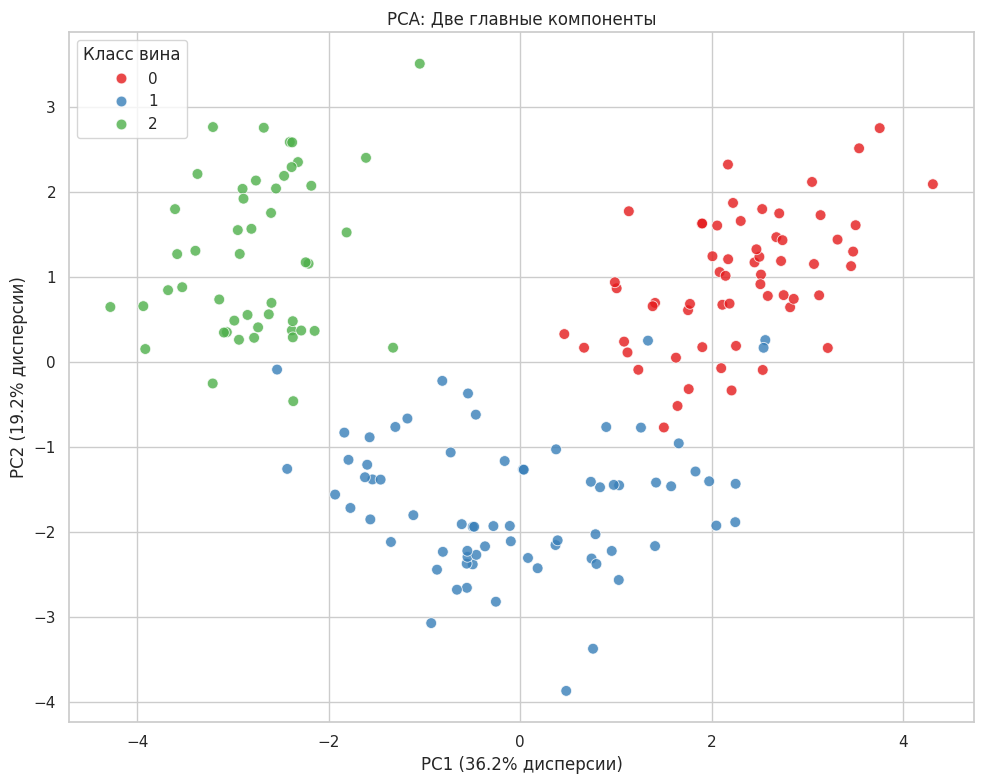

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Инициализация PCA с 2 компонентами
pca = PCA(n_components=2)

# Обучаем PCA и преобразуем данные
X_pca = pca.fit_transform(X_scaled)

# Доля сохранённой дисперсии
explained_variance = pca.explained_variance_ratio_
print(f"Доля сохранённой дисперсии:\n")
print(f"Первая компонента: {explained_variance[0]:.4f}\n")
print(f"Вторая компонента: {explained_variance[1]:.4f}\n")
print(f"Суммарно: {explained_variance.sum():.4f}\n")

# Создаём DataFrame для удобства визуализации
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Визуализация scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', s=60, alpha=0.8)
plt.title('PCA: Две главные компоненты')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% дисперсии)')
plt.legend(title='Класс вина')
plt.tight_layout()
plt.show()

### **Комментарий к результатам PCA после нормализации данных**

После нормализации данных с помощью `StandardScaler` в PCA получены следующие доли объяснённой дисперсии:
- **Первая компонента (PC1)**: 36.2%  
- **Вторая компонента (PC2)**: 19.2%  
- **Суммарно**: 55.4%  

Это означает, что:
1. **Нормализация устранила проблему доминирования одной компоненты** (ранее PC1 объясняла 99.81% дисперсии). Теперь данные распределены более равномерно между компонентами, что типично для корректно масштабированных признаков.
2. **PC1 и PC2 совместно объясняют 55.4% дисперсии**, что является приемлемым, но не идеальным. Оставшиеся 44.6% приходятся на другие компоненты, которые не были включены в анализ (так как `n_components=2`). Для более полного описания данных можно увеличить число компонент.
3. Нормализация данных улучшила интерпретацию PCA. Теперь:
- PC1 и PC2 несут осмысленную информацию о различиях между классами.
- Все классы практически разделимы по двум компонентам.

In [13]:
# Инициализация PCA с 3 компонентами
pca = PCA(n_components=3)

# Обучаем PCA и преобразуем данные
X_pca = pca.fit_transform(X_scaled)

# Доля сохранённой дисперсии
explained_variance = pca.explained_variance_ratio_
print(f"Доля сохранённой дисперсии:\n")
for k, v in enumerate(explained_variance, 1):
    print(f"Компонента {k}: {v:.4f}\n")
print(f"Суммарно: {explained_variance.sum():.4f}\n")

Доля сохранённой дисперсии:

Компонента 1: 0.3620

Компонента 2: 0.1921

Компонента 3: 0.1112

Суммарно: 0.6653



**По трем компонентам разделение классов будет лучше, т.к. суммарная доля сохраненной дисперсии уже 66.53%**